In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_titanic = pd.read_csv('D:/Hocmay/Titanic_ML_From_Disaster/Titanic_Project_Information_Data/train.csv')
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[4]:    
**SibSp** ranges from 0 to 8, so it is divided into the following stages:
- Group 1: SibSp = 0
- Group 2: SibSp = 1
- Group 3: SibSp = 2
- Group 4: SibSp = 3
- Group 5: SibSp = 4
- Group 6: SibSp = 5
- Group 7: SibSp = 8

In the training data, SibSp values of 6 and 7 do not appear, so they will not be considered, and the maximum value displayed is 8.

**Parch** ranges from 0 to 6, so it is divided into the following stages:
- Group 1: Parch = 0
- Group 2: Parch = 1
- Group 3: Parch = 2
- Group 4: Parch = 3
- Group 5: Parch = 4
- Group 6: Parch = 5
- Group 7: Parch = 6

In the training data, Parch values greater than 6 do not appear, so they will not be considered, and the maximum value displayed is 6.


Display the correlation heatmap for the groups above.

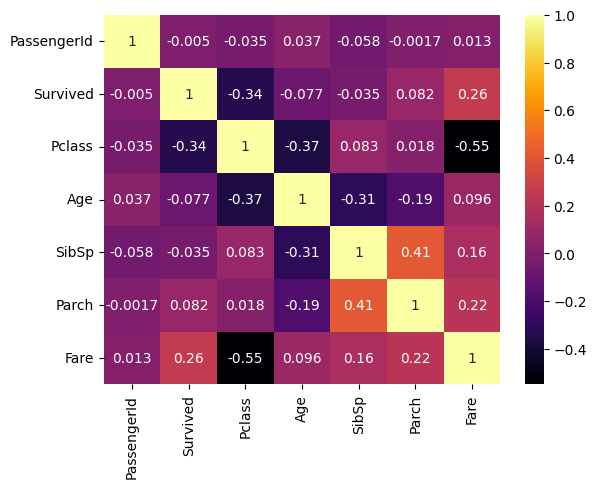

In [21]:
import seaborn as sns

sns.heatmap(data_titanic.corr(numeric_only=True), cmap="inferno", annot=True)
plt.show()

Because the new version of the Seaborn library no longer supports writing `sns.heatmap(data_titanic.corr(), cmap="inferno", annot=True)` in this way in the `sns.heatmap` function, the solution is to pass a boolean parameter into the `heatmap` function, `sns.heatmap(data_titanic.corr(numeric_only=True), cmap="inferno", annot=True)`. If `True`, the value will be displayed on the heatmap, and if `False`, the value will not be displayed. https://seaborn.pydata.org/whatsnew/v0.11.0.html